# Test of model(s)

Script to test a saved model on (potentially) new datas

In [3]:
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Load saved model

In [5]:
saving_path='C:/Users/manon/Desktop/Projet_2 _ML/code/models/'
name='model_cnn_1'

model = keras.models.load_model(saving_path+name)

## Load Data

In [6]:
data_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Combined_All_WithThreshold.csv'

tx = pd.read_csv(data_path,sep=",",squeeze=True)
#tx = np.genfromtxt(data_path, delimiter=",")
x=tx.iloc[:, :400]
y = pd.read_csv(data_path,sep=",",usecols=[400],squeeze=True)

#y = np.genfromtxt(data_path, delimiter=",", usecols=400)
ycat = tf.keras.utils.to_categorical(y,num_classes=14)
#data = tf.data.Dataset.from_tensor_slices(x,y)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, ycat, test_size=0.2, random_state=4)
n_samples, n_features = X_train.shape[0], X_train.shape[1]
n_outputs=14

In [8]:
Y_pred = model.predict(X_test, 2182)
y_pred = np.argmax(Y_pred, axis=1)

In [9]:
#yshape=np.zeros(14)
Y_test=np.argmax(y_test, axis=1)#, out=yshape
acc = sum(1 for y_p, y_t in zip(y_pred, Y_test) if y_p == y_t)
score = acc/2182
print(score)

0.8102658111824015


## Plot of m

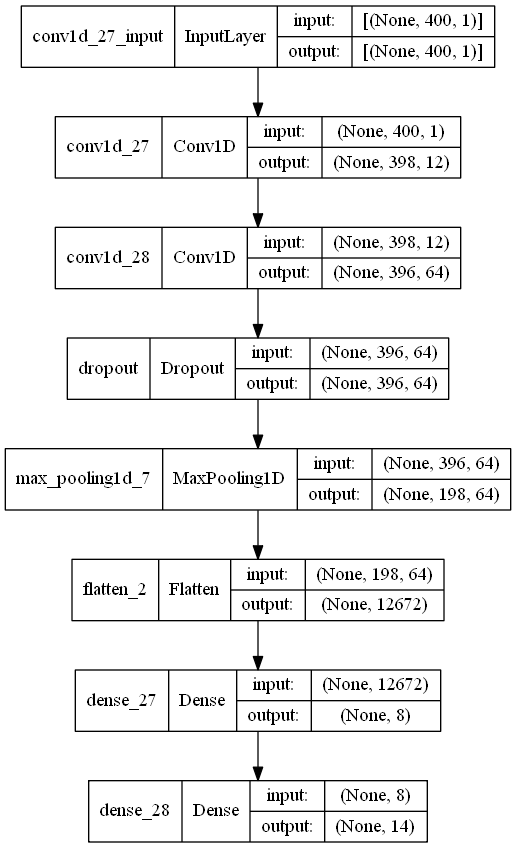

In [10]:
from tensorflow.keras.utils import plot_model#see the inputs and outputs
import graphviz
import pydot

plot_model(model,show_shapes=True)